In [172]:
from itertools import product
import pandas as pd
import numpy as np
import os,sys
from datetime import datetime,timedelta
from multiprocessing import Pool
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

os.chdir('/data/arpit.goel/33_GrocerySales/')
idv=['f2','f3','f4','f5','f6','f7','f8']
train=pd.read_csv('06.Master/01.Master_2017-07-01_91.csv',parse_dates=['date'],index_col=['date'])
test=pd.read_csv('06.Master/01.Master_2017-08-01_91.csv',parse_dates=['date'],index_col=['date'])


In [174]:
idv=['f2','f3','f4','f5','f6','f7','f8']
ins=train[train['unit_sales'].fillna(0)>0]
oos=test[test['unit_sales'].fillna(0)>0]
ins['log_sales']=np.log(1+ins['unit_sales'])
oos['log_sales']=np.log(1+oos['unit_sales'])
means=ins[idv].mean()
ins=ins.fillna(means) 
oos=oos.fillna(means)
reg=LinearRegression()
reg.fit(ins[idv],ins['log_sales'])
ins['prediction']=reg.predict(ins[idv])
oos['prediction']=reg.predict(oos[idv])

/data/arpit.goel/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/data/arpit.goel/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,log_sales,f1,f2,f3,f4,prediction
date,,,,,,
2017-08-01,2.484907,2.714879,2.735225,2.590277,2.606959,2.740206
2017-08-02,2.197225,2.714879,2.735225,2.720491,2.736883,2.796810
2017-08-03,2.772589,2.714879,2.735225,2.351277,2.292962,2.642448
2017-08-04,3.044522,2.714879,2.630104,2.729134,2.622310,2.905795
2017-08-05,2.639057,2.714879,2.630104,2.876563,2.792417,2.976317
2017-08-06,3.401197,2.714879,2.630104,3.110920,2.993756,3.086751
2017-08-07,2.197225,2.714879,2.630104,2.625491,2.265399,2.747986
2017-08-08,2.995732,2.714879,2.630104,2.590277,2.562276,2.768681
2017-08-09,2.772589,2.714879,2.630104,2.720491,2.678766,2.822909


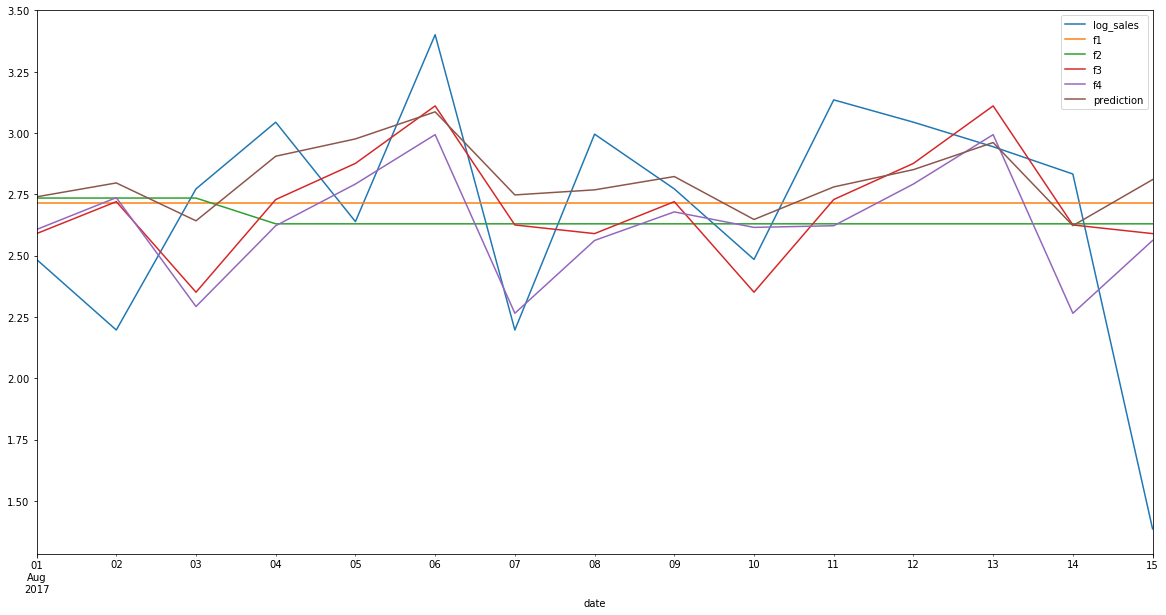

In [196]:
sample=oos[oos['store_nbr']==41]
sample=sample[sample['item_nbr']==114790]
sample[['log_sales','f1','f2','f3','f4','prediction']].plot(figsize=(20,10))
sample[['log_sales','f1','f2','f3','f4','prediction']]

In [187]:
sample=oos[oos['store_nbr']==1]
sample.groupby('item_nbr')['item_nbr'].count()

item_nbr
96995       5
99197       3
103520      9
103665     12
105574     13
105575     15
105577      8
105693      6
105737      9
105857     14
106716     14
108079      6
108696     13
108698      9
108701     11
108786     15
108797     15
108862      9
108952     10
111223     13
111397      7
112830     10
114778     13
114790     13
114799      8
114800     13
115267     11
115611     15
115693     13
115720      7
           ..
2087978     8
2088860     4
2088922    13
2089250     1
2089276     2
2089339    10
2090125     5
2099230     5
2101795    14
2103250     4
2106464    14
2108569     7
2108843     5
2109909     8
2110456     6
2111684     7
2111870    14
2112404    14
2113343     5
2113914     9
2114566     7
2114812     4
2116416     9
2122188     8
2122676     3
2123468     3
2123727     3
2123775     3
2124052    11
2127114     1
Name: item_nbr, dtype: int64

In [1]:
import statsmodels.api as sm

idv=['intercept','f1']
means=ins[idv].mean()
X1=oos.fillna(means)
X2=oos.fillna(means)
logit1 = sm.OLS(oos['log_sales'],X1[idv])
result = logit1.fit()

print (result.summary())

NameError: name 'ins' is not defined